In [1]:
%matplotlib inline
%pip install scipy
%pip install altair
%pip install statsmodels
%pip install scikit-learn
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# get the closing price of AMZN Stock
amzn = yf.download('1101.TW', start='2020-01-01', end='2023-11-28', progress=False)['Close']
amzn = pd.DataFrame(amzn)
amzn['amzn_return'] = amzn['Close'].pct_change()
amzn['amzn_log_return'] = np.log(amzn['Close']) - np.log(amzn['Close'].shift(1))
amzn.dropna(inplace=True)

# get the closing price of NASDAQ Index
nasdaq = yf.download('0050.TW', start='2020-01-01', end='2023-11-28', progress=False)['Close']
nasdaq = pd.DataFrame(nasdaq)
nasdaq['nasdaq_return'] = nasdaq['Close'].pct_change()
nasdaq['nasdaq_log_return'] = np.log(nasdaq['Close']) - np.log(nasdaq['Close'].shift(1))
nasdaq.dropna(inplace=True)
print(amzn.amzn_return)
print(nasdaq.nasdaq_return)

Date
2020-01-03   -0.003401
2020-01-06   -0.011376
2020-01-07    0.003452
2020-01-08   -0.004587
2020-01-09    0.001152
                ...   
2023-11-21    0.017857
2023-11-22   -0.010234
2023-11-23    0.004431
2023-11-24   -0.007353
2023-11-27    0.005926
Name: amzn_return, Length: 948, dtype: float64
Date
2020-01-03    0.000000
2020-01-06   -0.012801
2020-01-07   -0.003112
2020-01-08   -0.004683
2020-01-09    0.013591
                ...   
2023-11-21    0.012218
2023-11-22   -0.009053
2023-11-23   -0.000381
2023-11-24   -0.000762
2023-11-27   -0.006479
Name: nasdaq_return, Length: 948, dtype: float64


In [22]:
def market_beta(X,Y,N):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    N = The length of the Window
     
    It returns the alphas and the betas of
    the rolling regression
    """
     
    # all the observations
    obs = len(X)
     
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
     
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
     
     
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
         
        betas[i+N]  = regressor.coef_[0]
        alphas[i+N]  = regressor.intercept_
 
    return(alphas, betas)
  
results = market_beta(nasdaq.nasdaq_return,amzn.amzn_return, 60)#60天
 
results = pd.DataFrame(list(zip(*results)), columns = ['alpha', 'beta'])

# 計算避險口數
#現貨市值為2571177130500,期貨指數為11568.5,每點價值為50
#res = stats.linregress(return_apple.ret, return_market.ret)
results['sell'] = results['beta'] * 2571177130500 / (11568.5 * 50)

#印出所有results
for i in range(len(results)):
    print(results.iloc[i])

alpha   NaN
beta    NaN
sell    NaN
Name: 0, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 1, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 2, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 3, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 4, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 5, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 6, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 7, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 8, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 9, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 10, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 11, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 12, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 13, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 14, dtype: float64
alpha   NaN
beta    NaN
sell    NaN
Name: 15, dtype: float64
alpha   NaN
beta    NaN
sell    Na

alpha   -1.450690e-03
beta     4.022332e-01
sell     1.787981e+06
Name: 394, dtype: float64
alpha   -1.284548e-03
beta     3.978417e-01
sell     1.768460e+06
Name: 395, dtype: float64
alpha   -1.152531e-03
beta     4.163056e-01
sell     1.850535e+06
Name: 396, dtype: float64
alpha   -1.173254e-03
beta     4.152037e-01
sell     1.845637e+06
Name: 397, dtype: float64
alpha   -1.341713e-03
beta     3.948351e-01
sell     1.755095e+06
Name: 398, dtype: float64
alpha   -1.413979e-03
beta     3.871933e-01
sell     1.721127e+06
Name: 399, dtype: float64
alpha   -1.453254e-03
beta     4.023439e-01
sell     1.788473e+06
Name: 400, dtype: float64
alpha   -1.565993e-03
beta     4.051393e-01
sell     1.800899e+06
Name: 401, dtype: float64
alpha   -1.226303e-03
beta     4.200039e-01
sell     1.866974e+06
Name: 402, dtype: float64
alpha   -1.131969e-03
beta     4.216868e-01
sell     1.874455e+06
Name: 403, dtype: float64
alpha   -1.261052e-03
beta     4.334102e-01
sell     1.926567e+06
Name: 404, dty

alpha   -3.042659e-04
beta     2.501036e-01
sell     1.111744e+06
Name: 857, dtype: float64
alpha   -5.757461e-04
beta     2.768847e-01
sell     1.230790e+06
Name: 858, dtype: float64
alpha   -1.154310e-03
beta     3.034834e-01
sell     1.349025e+06
Name: 859, dtype: float64
alpha   -1.903795e-03
beta     3.646882e-01
sell     1.621088e+06
Name: 860, dtype: float64
alpha   -1.267521e-03
beta     2.965501e-01
sell     1.318205e+06
Name: 861, dtype: float64
alpha   -1.335273e-03
beta     3.735601e-01
sell     1.660525e+06
Name: 862, dtype: float64
alpha   -1.194195e-03
beta     3.696002e-01
sell     1.642923e+06
Name: 863, dtype: float64
alpha   -1.155228e-03
beta     3.755588e-01
sell     1.669409e+06
Name: 864, dtype: float64
alpha   -1.636542e-03
beta     3.685283e-01
sell     1.638158e+06
Name: 865, dtype: float64
alpha   -1.467489e-03
beta     3.561261e-01
sell     1.583029e+06
Name: 866, dtype: float64
alpha   -1.359477e-03
beta     3.611055e-01
sell     1.605163e+06
Name: 867, dty

Text(0.5, 1.0, 'Market Beta: 1101 vs 0050 with Rolling Window of 60 Days')

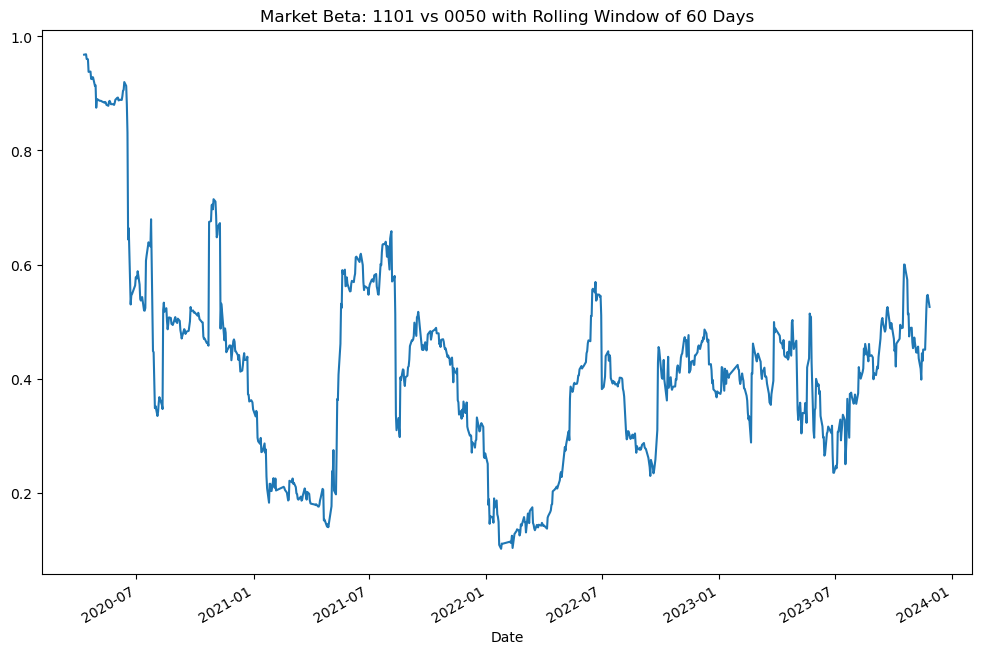

In [23]:
results.index = amzn.index
plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("Market Beta: 1101 vs 0050 with Rolling Window of 60 Days")

Text(0.5, 1.0, 'Hedge Position: 1101 vs 0050 with Rolling Window of 60 Days')

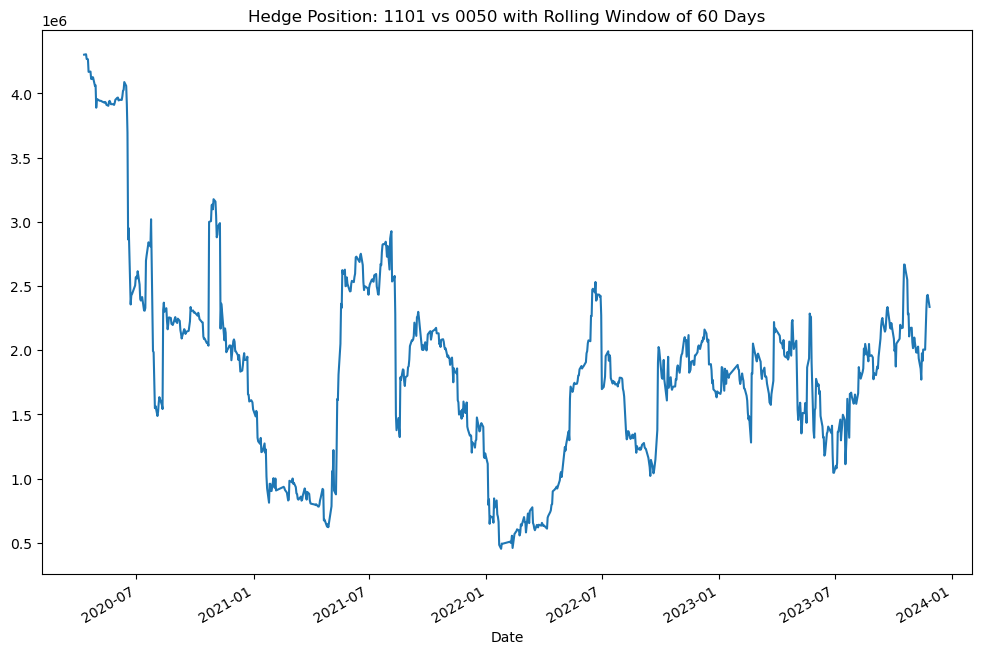

In [24]:
results.index = amzn.index
plt.figure(figsize=(12,8))
results.sell.plot.line()
plt.title("Hedge Position: 1101 vs 0050 with Rolling Window of 60 Days")